In [1]:
import numpy as np
import pandas as pd

from load_data import load_data
from utils.metrics import compute_metrics

from classifiers import EEGNet_classification, EEGNet_SSVEP_classification, EEGNet_TSGL_classification, EEGNet_DeepConvNet_classification, EEGNet_ShallowConvNet_classification
import utils.variables as v

from pyriemann.utils.viz import plot_confusion_matrix


In [2]:
data_type = 'new_ica'
label_type = 'stai'

train_data, test_data, val_data, train_labels, test_labels, val_labels = load_data(data_type, label_type, epoched = True, binary = True)

Filtering out invalid recordings



ERROR:root:1) Failed to read data for recording P006_S002_001
ERROR:root:1) Failed to read data for recording P006_S002_002
ERROR:root:1) Failed to read data for recording P010_S001_001
ERROR:root:1) Failed to read data for recording P013_S001_001
ERROR:root:1) Failed to read data for recording P013_S001_002
ERROR:root:1) Failed to read data for recording P020_S001_001
ERROR:root:1) Failed to read data for recording P023_S002_002
ERROR:root:1) Failed to read data for recording P028_S001_001
ERROR:root:1) Failed to read data for recording P028_S001_002


Returning valid recordings

Valid recs: 
 ['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001', 'P011_S001_002', 'P011_S002_001', 'P011_S002_002', 'P012_S001_001', 'P012_S001_002', 'P012_S002_001', 'P012_S002_002', 'P013_S002_001', 'P013_S002_002', 'P014_S001_001', 'P014_S001_002', 'P014_S002_001', 'P014_S002_002', 'P015_S001_001', 'P015_S001_002', 'P015_S002_001', 'P015_S002_002', 'P016_S001_001', 'P016

In [3]:
probs_EEGNet = EEGNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type, epoched = True)

True
new_ica
Epoch 1/300

Epoch 1: val_loss improved from inf to 0.73389, saving model to /tmp\checkpoint.h5
207/207 - 12s - loss: 0.9681 - accuracy: 0.4318 - val_loss: 0.7339 - val_accuracy: 0.3125 - 12s/epoch - 58ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 0.73389
207/207 - 7s - loss: 0.9640 - accuracy: 0.4318 - val_loss: 0.7606 - val_accuracy: 0.3125 - 7s/epoch - 32ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 0.73389
207/207 - 7s - loss: 0.9627 - accuracy: 0.4318 - val_loss: 0.7595 - val_accuracy: 0.3125 - 7s/epoch - 32ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 0.73389
207/207 - 8s - loss: 0.9631 - accuracy: 0.4317 - val_loss: 0.8592 - val_accuracy: 0.3125 - 8s/epoch - 39ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 0.73389
207/207 - 7s - loss: 0.9619 - accuracy: 0.4318 - val_loss: 0.9926 - val_accuracy: 0.3125 - 7s/epoch - 31ms/step
Epoch 6/300

Epoch 6: val_loss did not improve from 0.73389
207/207 - 10s - loss: 0.9625 

[0 0 0 ... 0 0 0]
[1. 1. 1. ... 0. 0. 0.]

 Confusion matrix:
[[3300    0]
 [2400    0]]
Null error in specificity
[57.89 57.89  0.  ]


c:\Users\annej\anaconda3\envs\MNE\lib\site-packages\pyriemann\utils\viz.py:24: RuntimeWarning: invalid value encountered in true_divide
  cm = 100 * cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


<AxesSubplot:title={'center':'Confusion matrix for EEGNet on ICA data'}, xlabel='Predicted label', ylabel='True label'>

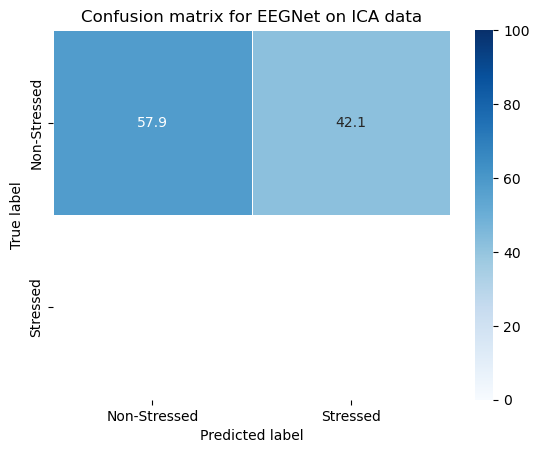

In [4]:
preds_EEGNet = probs_EEGNet.argmax(axis = -1)  
print(preds_EEGNet)
print(test_labels[:,0].T)

performance_EEGNet = compute_metrics(test_labels, preds_EEGNet)
print(performance_EEGNet)

plot_confusion_matrix(preds_EEGNet, test_labels, ['Non-Stressed', 'Stressed'], title = 'Confusion matrix for EEGNet on ICA data')

In [5]:
probs_TSGL = EEGNet_TSGL_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type, epoched = True)

Epoch 1/300

Epoch 1: val_loss improved from inf to 0.82909, saving model to /tmp\checkpoint.h5
413/413 - 39s - loss: 1.1461 - accuracy: 0.4356 - val_loss: 0.8291 - val_accuracy: 0.3125 - 39s/epoch - 95ms/step
Epoch 2/300

Epoch 2: val_loss improved from 0.82909 to 0.75849, saving model to /tmp\checkpoint.h5
413/413 - 37s - loss: 1.0273 - accuracy: 0.4330 - val_loss: 0.7585 - val_accuracy: 0.3162 - 37s/epoch - 90ms/step
Epoch 3/300

Epoch 3: val_loss improved from 0.75849 to 0.71273, saving model to /tmp\checkpoint.h5
413/413 - 37s - loss: 1.0155 - accuracy: 0.4318 - val_loss: 0.7127 - val_accuracy: 0.6850 - 37s/epoch - 89ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 0.71273
413/413 - 37s - loss: 1.0013 - accuracy: 0.4326 - val_loss: 0.7859 - val_accuracy: 0.3125 - 37s/epoch - 89ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 0.71273
413/413 - 38s - loss: 1.0116 - accuracy: 0.4370 - val_loss: 1.7612 - val_accuracy: 0.3125 - 38s/epoch - 93ms/step
Epoch 6/300

E

[[0.63754857 0.36245146]
 [0.62820315 0.37179688]
 [0.6293789  0.3706212 ]
 ...
 [0.6241371  0.3758629 ]
 [0.63444257 0.36555746]
 [0.6286932  0.3713068 ]]
[0 0 0 ... 0 0 0]
[1. 1. 1. ... 0. 0. 0.]

 Confusion matrix:
[[3300    0]
 [2400    0]]
Null error in specificity
[57.89 57.89  0.  ]


c:\Users\annej\anaconda3\envs\MNE\lib\site-packages\pyriemann\utils\viz.py:24: RuntimeWarning: invalid value encountered in true_divide
  cm = 100 * cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


<AxesSubplot:title={'center':'Confusion matrix for TSGL on ICA data'}, xlabel='Predicted label', ylabel='True label'>

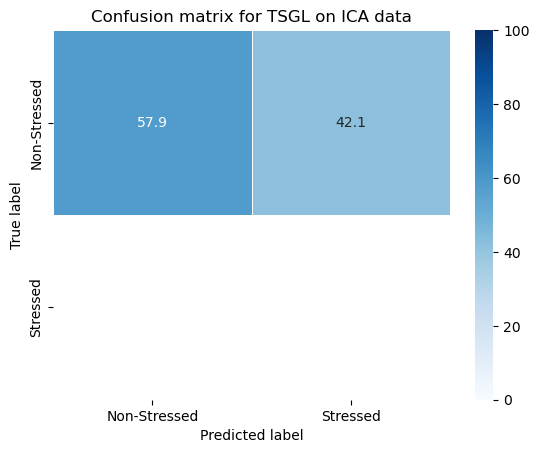

In [6]:
print(probs_TSGL)
preds_TSGL = probs_TSGL.argmax(axis = -1)  
print(preds_TSGL)
print(test_labels[:,0].T)

performance_TSGL = compute_metrics(test_labels, preds_TSGL)
print(performance_TSGL)

plot_confusion_matrix(preds_TSGL, test_labels, ['Non-Stressed', 'Stressed'], title = 'Confusion matrix for TSGL on ICA data')

In [7]:
probs_Deep = EEGNet_DeepConvNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type, epoched = True)

Epoch 1/300

Epoch 1: val_loss improved from inf to 0.72523, saving model to /tmp\checkpoint.h5
413/413 - 11s - loss: 1.0591 - accuracy: 0.4670 - val_loss: 0.7252 - val_accuracy: 0.3125 - 11s/epoch - 27ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 0.72523
413/413 - 9s - loss: 1.0192 - accuracy: 0.4661 - val_loss: 2.1803 - val_accuracy: 0.3125 - 9s/epoch - 22ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 0.72523
413/413 - 9s - loss: 1.0172 - accuracy: 0.4695 - val_loss: 2.0179 - val_accuracy: 0.3125 - 9s/epoch - 22ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 0.72523
413/413 - 10s - loss: 1.0149 - accuracy: 0.4568 - val_loss: 3.4360 - val_accuracy: 0.3125 - 10s/epoch - 24ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 0.72523
413/413 - 10s - loss: 1.0122 - accuracy: 0.4570 - val_loss: 2.2777 - val_accuracy: 0.3125 - 10s/epoch - 24ms/step
Epoch 6/300

Epoch 6: val_loss did not improve from 0.72523
413/413 - 10s - loss: 1.0017 - accurac

[[0.6172634  0.42878726]
 [0.6169782  0.42953387]
 [0.6170041  0.4297525 ]
 ...
 [0.61698014 0.4297645 ]
 [0.6171377  0.4294967 ]
 [0.61699086 0.4296414 ]]
[0 0 0 ... 0 0 0]
[[1. 1. 1. ... 0. 0. 0.]]

 Confusion matrix:
[[3300    0]
 [2400    0]]
Null error in specificity
[57.89 57.89  0.  ]


c:\Users\annej\anaconda3\envs\MNE\lib\site-packages\pyriemann\utils\viz.py:24: RuntimeWarning: invalid value encountered in true_divide
  cm = 100 * cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


<AxesSubplot:title={'center':'Confusion matrix for DeepConvNet on New_ICA data'}, xlabel='Predicted label', ylabel='True label'>

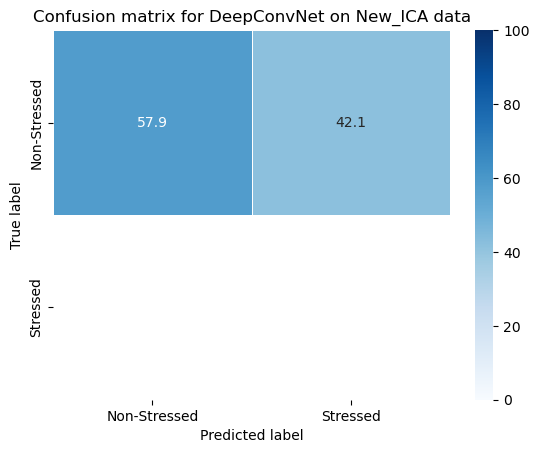

In [8]:
print(probs_Deep)
preds_Deep = probs_Deep.argmax(axis = -1)  
print(preds_Deep)
print(test_labels.T)

performance_Deep = compute_metrics(test_labels, preds_Deep)
print(performance_Deep)
plot_confusion_matrix(preds_Deep, test_labels, ['Non-Stressed', 'Stressed'], title = 'Confusion matrix for DeepConvNet on New_ICA data')

In [9]:
probs_Shallow = EEGNet_ShallowConvNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type, epoched = True)

Epoch 1/300

Epoch 1: val_loss improved from inf to 1.51594, saving model to /tmp\checkpoint.h5
413/413 - 8s - loss: 1.8804 - accuracy: 0.4880 - val_loss: 1.5159 - val_accuracy: 0.3125 - 8s/epoch - 18ms/step
Epoch 2/300

Epoch 2: val_loss improved from 1.51594 to 0.86213, saving model to /tmp\checkpoint.h5
413/413 - 7s - loss: 1.1960 - accuracy: 0.4706 - val_loss: 0.8621 - val_accuracy: 0.3125 - 7s/epoch - 16ms/step
Epoch 3/300

Epoch 3: val_loss improved from 0.86213 to 0.62793, saving model to /tmp\checkpoint.h5
413/413 - 6s - loss: 1.1498 - accuracy: 0.4707 - val_loss: 0.6279 - val_accuracy: 0.6875 - 6s/epoch - 15ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 0.62793
413/413 - 6s - loss: 1.1692 - accuracy: 0.4764 - val_loss: 0.8783 - val_accuracy: 0.3125 - 6s/epoch - 15ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 0.62793
413/413 - 6s - loss: 1.1639 - accuracy: 0.4774 - val_loss: 0.7388 - val_accuracy: 0.3125 - 6s/epoch - 15ms/step
Epoch 6/300

Epoch 6: va

[[0.59571314 0.40428677]
 [0.595711   0.40428892]
 [0.59599423 0.40400556]
 ...
 [0.59600323 0.40399668]
 [0.595964   0.40403587]
 [0.5957991  0.4042009 ]]
[0 0 0 ... 0 0 0]
[[1. 1. 1. ... 0. 0. 0.]]

 Confusion matrix:
[[3300    0]
 [2400    0]]
Null error in specificity
[57.89 57.89  0.  ]


c:\Users\annej\anaconda3\envs\MNE\lib\site-packages\pyriemann\utils\viz.py:24: RuntimeWarning: invalid value encountered in true_divide
  cm = 100 * cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


<AxesSubplot:title={'center':'Confusion matrix for ShallowConvNet on ICA data'}, xlabel='Predicted label', ylabel='True label'>

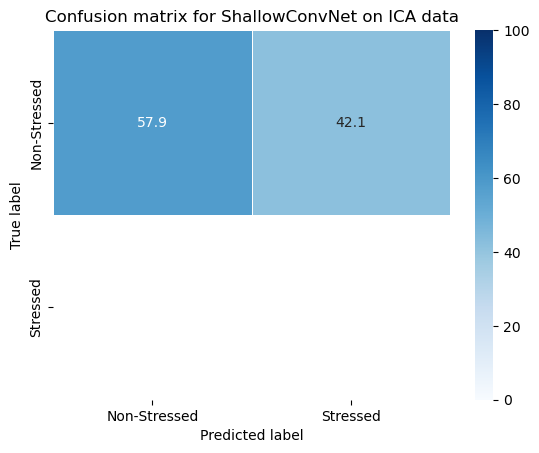

In [10]:
print(probs_Shallow)
preds_Shallow = probs_Shallow.argmax(axis = -1)  
print(preds_Shallow)
print(test_labels.T)

performance_Shallow = compute_metrics(test_labels, preds_Shallow)
print(performance_Shallow)

plot_confusion_matrix(preds_Shallow, test_labels, ['Non-Stressed', 'Stressed'], title = 'Confusion matrix for ShallowConvNet on ICA data')